# Import Modules

In [1]:
# basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import math

%matplotlib inline

In [2]:
import spacy
import re

In [3]:
link_train = "./dataset/train.csv"
link_clean = "./dataset/clean.csv"
link_test = "./dataset/test.csv"

In [4]:
train_df = pd.read_csv(link_train, delimiter=";")
clean_df = pd.read_csv(link_clean, delimiter=",")
test_df = pd.read_csv(link_test, delimiter=";")

In [5]:
# clean_df['text'] = clean_df['stemmed_text']
# clean_df.drop(columns=['label_angka', 'stemmed_text', 'Unnamed: 0'], inplace=True)

In [6]:
train_df.head()

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik


In [7]:
clean_df.head()

,text,label
0,kunjung prabowo untuk resmi serah proyek bantu...,Sumber Daya Alam
1,anies tepuk tangan riah jadi rektor wajib mata...,Politik
2,benar dukung goblok dukung hanya saja pak ridw...,Demografi
3,waktu anies sikap kritis kerja pak prabowo ang...,Politik
4,anies baswedan harap asn masuk tni polri pegan...,Politik


In [8]:
test_df.head()

,IDText,Text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...


# Dataset Overview

In [9]:
print(train_df.shape)
print(clean_df.shape)
print(test_df.shape)

(5000, 2)
(4338, 2)
(1000, 2)


In [10]:
train_df.info()
clean_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4333 non-null   object
 1   label   4338 non-null   object
dtypes: object(2)
memory usage: 67.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IDText  1000 non-null   object
 1   Text    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [11]:
train_df.describe()

,text,label
count,5000,5000
unique,4583,8
top,RT Abah Anies ingin mengangkat martabat petani...,Politik
freq,42,2972


In [12]:
test_df.describe()

,IDText,Text
count,1000,1000
unique,1000,1000
top,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
freq,1,1


## Missing Values?

Mari kita mengecek jika terdapat kolom yang hilang (Missing)

In [13]:
train_df.isna().sum()

text     0
label    0
dtype: int64

In [14]:
clean_df.isna().sum()

text     5
label    0
dtype: int64

## Duplicated values?

In [15]:
train_df.duplicated().sum()

381

In [16]:
clean_df.duplicated().sum()

0

In [17]:
test_df.duplicated().sum()

0

Ternyata, terdapat 381 train data dan 286 data setelah preprocessing yang duplikat dari 5000 data training dan 4583 data setelah preprocessing. Mari kita lihat seperti apa contoh2 data yang duplikat

In [18]:
def check_duplicated(df):
    all_duplicated_texts = df[df['text'].duplicated(keep=False)].copy()
    
    print("\nDetailed comparison of duplicated text entries:")
    grouped = all_duplicated_texts.groupby('text')
    
    for name, group in grouped:
        print(f"\nText: {name}")
        print(group)
        
check_duplicated(train_df)


Detailed comparison of duplicated text entries:

Text: @gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= @gqAL2HIcdWKR2U/VFUq3R0TFxXxtxCsKyUXAKn9R5o0= Iya nih penting suara Batak sebagai populasi etnis ketiga terbesar setelah Jawa Sunda. Mayoritas Batak Kristen cukup anti sama Anies karena diframing radikal sejak
                                                   text      label
1967  @gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= ...  Demografi
3844  @gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= ...  Demografi

Text: Adi menginformasikan bahwa isu utama di kampung mereka adalah sulitnya mendapatkan air bersih dan masalah naiknya air laut. #IndonesiaSentris #IndonesiaHijau #02Melanjutkan #AnakMudaIndonesiaEmas Prabowo Subianto
                                                   text             label
1028  Adi menginformasikan bahwa isu utama di kampun...  Sumber Daya Alam
1311  Adi menginformasikan bahwa isu utama di kampun...  Sumber Daya Alam
2644  Adi menginformasikan bahwa isu utama di

In [19]:
check_duplicated(clean_df)


Detailed comparison of duplicated text entries:

Text: abah anies janji bakal revisi uu kpk kembali percaya publik calon presiden capres nomor urut anies baswedan janji laku benah komisi berantas korupsi kpk apabila tang pilih presiden pilpres langkah pertama anies benah lembaga antirasuah revisi undangundang uu nomor tahun ubah atas uu nomor tahun komisi berantas tindak pidana korupsi anies langkah revisi uu sebut tuju kembali percaya publik sekaligus kembali kpk dulu lembaga milik mampu berantas korupsi kembali kpk wibawa cara legal dulu arti revisi undangundang kpk revisi ini bisa kembali kpk posisi kuat ujar anies papar acara paku integritas calon presiden calon wakil presiden gedung kpk jakarta rabu malam baik uu anies komitmen cipta standar etika tinggi tubuh kpk anies ingin semua unsur kpk dulu mana pegawai mau ikut makan tak ingin ikut giat tidak dana kpk standar tinggi harus kembali kpk bukan undangundangnya beri kuat mandiri dalam baik pimpin maupun staf kerja dengan kode et

Terdapat 8 tipe kelas (multiclass) sesuai dengan tipe ASTAGATRA

Referensi ASTAGATRA : http://lib.lemhannas.go.id/public/media/catalog/0010-011600000000199/swf/4960/files/basic-html/page16.html

In [20]:
train_df.nunique()

text     4583
label       8
dtype: int64

In [21]:
clean_df.nunique()

text     4272
label       8
dtype: int64

In [22]:
train_df['label'].value_counts()

label
Politik                    2972
Sosial Budaya               587
Pertahanan dan Keamanan     400
Ideologi                    400
Ekonomi                     367
Sumber Daya Alam            192
Demografi                    62
Geografi                     20
Name: count, dtype: int64

In [23]:
clean_df['label'].value_counts()

label
Politik                    2895
Sosial Budaya               405
Ekonomi                     278
Pertahanan dan Keamanan     270
Ideologi                    263
Sumber Daya Alam            147
Demografi                    60
Geografi                     20
Name: count, dtype: int64

# Text Exploration

In [24]:
row = train_df[train_df['label'] == 'Ekonomi'].iloc[99]  # Ambil baris pertama yang label-nya 'Politik'
print(row['text']) 

Luar biasa. Pasangan Capres Cawapres Ganjar Pranowo Mahfud MD perjuangkan pertumbuhan koprasi dan UMKM dengan kredit 35%. Mari bersama bangun ekonomi yang kuat.#GanjarMahfudRebound #GanjarPranowoPilihanUmat #JNK


# EDA

## Persebaran Label

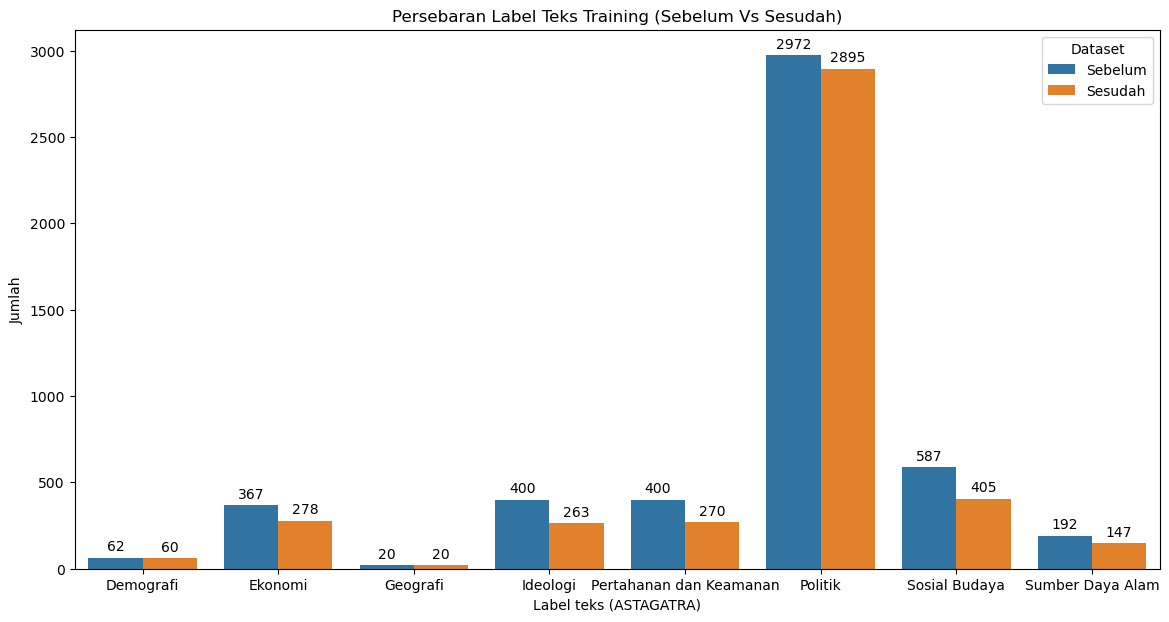

In [25]:
def label_distribution(train_df, process_df):
    # Hitung kemunculan setiap label dalam dataset
    before_df = train_df['label'].value_counts().sort_index()
    after_df = process_df['label'].value_counts().sort_index()

    # Gabung dalam satu DataFrame
    counts_df = pd.DataFrame({
        'Sebelum': before_df,
        'Sesudah': after_df
    }).reset_index().rename(columns={'index': 'label'})

    # Gabung untuk kemudahan plot
    counts_melted = counts_df.melt(id_vars='label', var_name='Dataset', value_name='Count')

    # Buat clustered barplot
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(x='label', y='Count', hue='Dataset', data=counts_melted)

    # Tambahkan label angka di tiap bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    plt.title('Persebaran Label Teks Training (Sebelum Vs Sesudah)')
    plt.xlabel('Label teks (ASTAGATRA)')
    plt.ylabel('Jumlah')
    plt.show()
    
label_distribution(train_df, clean_df)

## Kata (Token) paling populer (Token, Hastag, Username, Link)

In [26]:
def counter_word(df, view=10):
    counter = df['text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in counter for item in sublist])
    temp = pd.DataFrame(top.most_common(view))
    temp.columns = ['Common_words','count']
    return temp.style.background_gradient(cmap='Blues')

def counter_word2(df, view=10, length=5):
    counter = df['text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in counter for item in sublist if len(item) > length])
    temp = pd.DataFrame(top.most_common(view))
    temp.columns = ['Common_words','count']
    return temp.style.background_gradient(cmap='Blues')

In [27]:
# 10 kata paling populer dalam teks training
counter_word(train_df, 10)

,Common_words,count
0,dan,2845
1,RT,2795
2,[RE,2795
3,yang,2554
4,di,2121
5,Ganjar,1766
6,Anies,1672
7,Prabowo,1304
8,untuk,1263
9,yg,1079


Berdasarkan hasil diatas, kita dapat pastikan bahwa kata tertinggi terdiri dari stopword (dan, yang, di, untuk, yg), kata umum twitter (RT = Retweet Twitter atau RE) dan nama Calon Presiden (Anies, Prabowo, Ganjar).

In [28]:
def count_total_words(df):
    total_words = df['text'].apply(
        lambda x: len(str(x).split())
    ).sum()
    return total_words

def count_filtered_words(df, word_list):
    filtered_words = df['text'].apply(
        lambda x: sum(1 for word in str(x).split() if word in word_list)
    ).sum()
    return filtered_words

total_words = count_total_words(train_df)
filtered_words = count_filtered_words(train_df, ['dan', 'RT', '[RE', 'yang', 'di' , 'Ganjar', 'Anies', 'Prabowo', 'untuk', 'yg'])

print(f"Persentasi perbedaan : {filtered_words / total_words * 100} % ")
print(f"Total kata yang ada  : {total_words}")
print(f"Total top 10 kata    : {filtered_words}")

Persentasi perbedaan : 12.331159473388535 % 
Total kata yang ada  : 163764
Total top 10 kata    : 20194


Terdapat 163 ribu kata dalam teks sedangkan terdapat 20 ribu kata yang top 10 kata terbanyak, mencapai 12,33% dari total kata yang ada

In [29]:
# 10 kata paling populer dalam teks setelah preprocessing
counter_word(clean_df, 10)

,Common_words,count
0,anies,1976
1,ganjar,1776
2,prabowo,1622
3,pak,1050
4,jadi,892
5,pranowo,864
6,mahfud,819
7,dukung,743
8,indonesia,660
9,jnk,607


Berdasarkan hasil diatas, kita dapat mendapatkan bahwa nama calon presiden dan wakil presiden, diselingi kata 'pak', 'jadi', 'dukung' dan 'capres'.

In [30]:
total_words_clean = count_total_words(clean_df)
filtered_words_clean = count_filtered_words(clean_df, ['prabowo', 'anies', 'ganjar', 'pak', 'pranowo' , 'jadi', 'mahfud', 'dukung', 'indonesia', 'capres'])

print(f"Persentasi perbedaan : {filtered_words_clean / total_words_clean * 100} % ")
print(f"Total kata yang ada  : {total_words_clean}")
print(f"Total top 10 kata    : {filtered_words_clean}")

Persentasi perbedaan : 11.550942998630282 % 
Total kata yang ada  : 94910
Total top 10 kata    : 10963


Terdapat 100 ribu kata dalam teks sedangkan terdapat 12 ribu kata yang top 10 kata terbanyak, mencapai hampir 12% dari total kata yang ada

### Hastag

In [31]:
def counter_word_hastag(df, view=10):
    counter = df['text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in counter for item in sublist if '#' in item])
    temp = pd.DataFrame(top.most_common(view))
    temp.columns = ['Common_words','count']
    return temp.style.background_gradient(cmap='Blues')

# Top 20 hastag dalam teks training
counter_word_hastag(train_df, 10)

,Common_words,count
0,#GanjarPranowoPilihanUmat,658
1,#JNK,637
2,#GanjarMahfudRebound,558
3,#GanjarMahfud2024,377
4,#Coblos3,205
5,#AMINAjaDulu,172
6,#02Melanjutkan,143
7,#L3bihbaik,114
8,#DuluJokowiSekarangGanjar,100
9,#IndonesiaSentris,91


Bisa dilihat dari 20 hastag paling populer, rata-rata merupakan hastag yang mendukung calon presiden misalnya:

- #GanjarPranowoPilihanUmat atau #MahfudLebihBaik3 -> Mendukung Ganjar
- #02Melanjutkan atau #DiplomasiProgresif02 -> Mendukung Prabowo
- #AMINAjaDulu atau #AniesMuhaimin2024 -> Mendukung Anies

Kemudian ada kecerundungan hastag membahas mengenai depat capres, dibuktikan adanya hastag #DebatCapres dan topik mengenai Indonesia seperti #IndonesiaSentris dan #IndonesiaHijau

Yang unik bisa diambil dari top 2 Hastag yaitu #JNK, Hasil analisis dari Twitter (Sumber aslinya) terindikasi bentuk perusahaan atau organisasi masyarakat. Ditemukan juga rata-rata teks diikuti dengan hastag yang mendukung Ganjar. 

Contoh teks asli:
- https://twitter.com/KAMRANK41723936/status/1756932273109418122
- https://twitter.com/KAMRANK41723936/status/1756948650893410587

### Username

In [32]:
def counter_word_username(df, view=10):
    counter = df['text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in counter for item in sublist if '@' in item])
    temp = pd.DataFrame(top.most_common(view))
    temp.columns = ['Common_words','count']
    return temp.style.background_gradient(cmap='Blues')

# Top 20 username yang TAG dalam teks training
counter_word_username(train_df, 10)

,Common_words,count
0,@gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA=,2
1,@gqAL2HIcdWKR2U/VFUq3R0TFxXxtxCsKyUXAKn9R5o0=,2
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y=,1
3,@L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7Q=,1
4,@0Zdeh9QcTWu+z+fS3hRaTcFuSLRh56REFyRLq4/Jdlc=,1
5,@znOMP7ZMVU9dMuMNA/cIazC9q5+hgwVkTsQNdQLKgTc=,1
6,@hs5jZceksZrPM0NiWtKnsbSbZ1XyaZtU4OHkKgrcDk8=,1
7,@wEOWbjbQXX93e2r1/7iXQ1mV/pxGE9yrnUdgURpW0Y0=,1
8,@vaVbSLyok3xdwCAiYpXkJarkzroaILpIRIdpu/z3CJE=,1
9,@YcALzIavlM9mN2WtCz3omAmFsnJU8aBm4seMBHJD2vc=,1


In [33]:
def counter_word_username2(df, view=10):
    counter = df['text'].dropna().apply(lambda x: re.findall(r'\[RE ([^\]]+)\]', x)) 
    top = Counter([item for sublist in counter for item in sublist])
    temp = pd.DataFrame(top.most_common(view), columns=['Username', 'Count'])
    return temp.style.background_gradient(cmap='Blues')

counter_word_username2(train_df, 10)

,Username,Count
0,Yurissa_Samosir,103
1,ekowboy2,100
2,Mdy_Asmara1701,96
3,tempodotco,83
4,tvOneNews,60
5,kumparan,47
6,BangPino__,41
7,OposisiCerdas,40
8,Paltiwest,38
9,geloraco,34


Dari hasil diatas, kita dapat konklusikan bahwa @Yurissa_Samosir dan @ekowboy2 adalah akun yang paling banyak muncul di data, dimana kedua akun tersebut terus-terusan di tag.

https://twitter.com/Yurissa_Samosir
https://twitter.com/ekowboy2

### Link

In [42]:
def counter_word_link(df, view=10):
    counter = df['text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in counter for item in sublist if 't.co' in item])
    temp = pd.DataFrame(top.most_common(view))
    temp.columns = ['Common_words','count']
    return temp.style.background_gradient(cmap='Blues')

# Top 20 username yang TAG dalam teks training
counter_word_link(train_df, 10)

,Common_words,count
0,https://t.co/txIvBhLvn2,42
1,https://t.co/WmJR2OsbeZ,12
2,https://t.co/S9S9Kanr0z,11
3,https://t.co/wK9XuBdLBr,11
4,https://t.co/j5duokFbef,10
5,https://t.co/XpTnsPrinX,8
6,https://t.co/JkX9iUSArj,8
7,https://t.co/PbvdVo2aly,8
8,https://t.co/sV6ZKF9WZz,8
9,https://t.co/K5uavFp1B1,7


Berikut ini adalah link twitter yang paling banyak muncul dalam data teks, berikut ini linknya:
   
"
Abah Anies ingin mengangkat martabat petani agar tidak terus menerus menerima bansos karena penghasilannya cukup..

#AMINAjaDulu
"

Sepertinya teks yang berhubungan dengan Sumber Daya Alam dan mendukung paslon Anies dan Muh Aimin.

https://twitter.com/ekowboy2/status/1741796805996912649

## Persebaran Kata Terpopuler berdasarkan label

Setelah melihat keseluruhan token di semua teks, mari melihat persebaran token yang paling banyak muncul berdasarkan label

In [35]:
def counter_word_labeled(df, label, view=10):
    counter = df[df['label'] == label]['text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in counter for item in sublist])
    temp = pd.DataFrame(top.most_common(view))
    temp.columns = ['Common_words','count']
    return temp.style.background_gradient(cmap='Blues')

def counter_word_hastag_labeled(df, label, view=10):
    counter = df[df['label'] == label]['text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in counter for item in sublist if '#' in item])
    temp = pd.DataFrame(top.most_common(view))
    temp.columns = ['Common_words','count']
    return temp.style.background_gradient(cmap='Blues')

def counter_word_username_labeled(df, label, view=10):
    counter = df[df['label'] == label]['text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in counter for item in sublist if '@' in item])
    temp = pd.DataFrame(top.most_common(view))
    temp.columns = ['Common_words','count']
    return temp.style.background_gradient(cmap='Blues')

def counter_word_username2_labeled(df, label, view=10):
    counter = df[df['label'] == label]['text'].dropna().apply(lambda x: re.findall(r'\[RE ([^\]]+)\]', x)) 
    top = Counter([item for sublist in counter for item in sublist])
    temp = pd.DataFrame(top.most_common(view), columns=['Username', 'Count'])
    return temp.style.background_gradient(cmap='Blues')

def counter_word_link_labeled(df, label, view=10):
    counter = df[df['label'] == label]['text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in counter for item in sublist if 't.co' in item])
    temp = pd.DataFrame(top.most_common(view))
    temp.columns = ['Common_words','count']
    return temp.style.background_gradient(cmap='Blues')

In [36]:
labels = list(train_df.label.unique())
top_word = {}
top_hastag = {}
top_username1 = {}
top_username2 = {}
top_link = {}

for label in labels:
    top_word[label] = counter_word_labeled(clean_df, label, 10)
    top_hastag[label] = counter_word_hastag_labeled(train_df, label, 10)
    top_username1[label] = counter_word_username_labeled(train_df, label, 10)
    top_username2[label] = counter_word_username2_labeled(train_df, label, 10)
    top_link[label] = counter_word_link_labeled(train_df, label, 10)

Mari kita melihat dataset yang sudah dibersihkan agar dapat melihat lebih jelas kata-kata yang umum ditemukan.

In [37]:
for label in labels:
    print(f"Top 10 Token Label {label}")
    display(top_word[label])

Top 10 Token Label Sumber Daya Alam


,Common_words,count
0,anies,58
1,prabowo,48
2,tani,44
3,jadi,40
4,ganjar,39
5,pak,39
6,air,27
7,sama,23
8,food,22
9,program,22


Top 10 Token Label Politik


,Common_words,count
0,anies,1312
1,prabowo,1183
2,ganjar,1154
3,pak,654
4,mahfud,581
5,pranowo,567
6,dukung,557
7,jadi,552
8,jnk,445
9,sama,406


Top 10 Token Label Demografi


,Common_words,count
0,anies,39
1,ganjar,33
2,pak,20
3,dukung,17
4,prabowo,17
5,pilih,16
6,muda,16
7,sama,14
8,didik,13
9,mahfud,13


Top 10 Token Label Pertahanan dan Keamanan


,Common_words,count
0,prabowo,128
1,tahan,123
2,anies,94
3,ganjarmahfud,89
4,ganjar,80
5,pak,71
6,jadi,54
7,aman,46
8,tni,43
9,indonesia,42


Top 10 Token Label Ideologi


,Common_words,count
0,ganjar,142
1,prabowo,131
2,pranowo,103
3,anies,92
4,jadi,76
5,negara,72
6,indonesia,70
7,pimpin,62
8,mahfud,60
9,capres,53


Top 10 Token Label Ekonomi


,Common_words,count
0,ganjar,199
1,pranowo,124
2,ekonomi,113
3,jnk,100
4,mahfud,99
5,tani,90
6,program,83
7,capres,81
8,md,80
9,ganjarmahfudrebound,55


Top 10 Token Label Sosial Budaya


,Common_words,count
0,anies,313
1,pak,167
2,ganjar,124
3,jadi,105
4,sama,67
5,indonesia,67
6,anak,64
7,prabowo,60
8,lebih,58
9,didik,54


Top 10 Token Label Geografi


,Common_words,count
0,anies,14
1,jadi,11
2,pak,10
3,pulau,9
4,ganjar,5
5,sama,5
6,bangun,4
7,jakarta,4
8,prabowo,4
9,dukung,4


### Hastag

In [38]:
for label in labels:
    print(f"Top 10 Hastag Label {label}")
    display(top_hastag[label])

Top 10 Hastag Label Sumber Daya Alam


,Common_words,count
0,#IndonesiaSentris,29
1,#IndonesiaHijau,24
2,#02Melanjutkan,24
3,#AnakMudaIndonesiaEmas,24
4,#JNK,10
5,#GanjarMahfudRebound,9
6,#GanjarPranowoPilihanUmat,9
7,#GanjarMahfud2024,9
8,#Coblos3,4
9,#M3nangDebat4,3


Top 10 Hastag Label Politik


,Common_words,count
0,#JNK,428
1,#GanjarPranowoPilihanUmat,402
2,#GanjarMahfudRebound,374
3,#GanjarMahfud2024,205
4,#Coblos3,160
5,#AMINAjaDulu,101
6,#02Melanjutkan,95
7,#3GM,82
8,#DuluJokowiSekarangGanjar,76
9,#L3bihbaik,52


Top 10 Hastag Label Demografi


,Common_words,count
0,#GanjarMahfud2024,7
1,#L3bihbaik,3
2,#Coblos3,2
3,#IndonesiaSentris,2
4,#IndonesiaHijau,2
5,#02Melanjutkan,2
6,#AnakMudaIndonesiaEmas,2
7,#MahfudLebihBaik3,2
8,#GanjarPresidenRakyat,2
9,#Ganjar,1


Top 10 Hastag Label Pertahanan dan Keamanan


,Common_words,count
0,#GanjarMahfud2024,74
1,#Coblos3,33
2,#DuluJokowiSekarangGanjar,23
3,#L3bihbaik,19
4,#GanjarMahfudM3nangDebat,12
5,#02Melanjutkan,11
6,#DebatCapres,9
7,#AsalBukanPrabowo,7
8,#GanjarMahfudM3nang,6
9,#AMINAjaDulu,6


Top 10 Hastag Label Ideologi


,Common_words,count
0,#GanjarPranowoPilihanUmat,98
1,#GanjarMahfudRebound,88
2,#JNK,43
3,#GanjarMahfud2024,25
4,#Ganjar,25
5,#MenangSeputaran,24
6,#L3bihbaik,19
7,negara.#GanjarPranowoPilihanUmat,16
8,negara.#JNK,14
9,#MahfudLebihBaik3,14


Top 10 Hastag Label Ekonomi


,Common_words,count
0,#JNK,139
1,#GanjarPranowoPilihanUmat,138
2,#GanjarMahfudRebound,73
3,#GanjarMahfud2024,27
4,#RembuGanjar,19
5,Indonesia.#GanjarMahfudRebound,18
6,#L3bihbaik,12
7,investasi.#GanjarMahfudRebound,10
8,#MahfudLebihBaik3,8
9,#AMINAjaDulu,8


Top 10 Hastag Label Sosial Budaya


,Common_words,count
0,#AMINAjaDulu,54
1,#GanjarMahfud2024,29
2,#JNK,13
3,#GanjarMahfudRebound,12
4,#GanjarUntukSemua,10
5,#GanjarPresiden,10
6,#GanjarPranowoPilihanUmat,10
7,#PDIPerjuangan,9
8,#MEnangkanGAnjar,9
9,#Nomor3Pilihanku,9


Top 10 Hastag Label Geografi


,Common_words,count
0,#L3bihbaik,1
1,#MahfudLebihBaik3,1
2,#GanjarMahfud2024,1
3,#HotlineParisAMIN,1


### Username

In [39]:
for label in labels:
    print(f"Top 10 Username Label {label}")
    display(top_username1[label])

Top 10 Username Label Sumber Daya Alam


,Common_words,count
0,@zBDJBdOY1gPoCzWRVAIoM1H82pzxj5y/jEFzyA1FGko=,1
1,@VgGyd8apq/7EdnebbxLxhptFf8B5Lw71UzZ0EN1vViM=,1
2,@YPw/rPgDGdEpolEhZRiP8QADOzCqptKMbhK3vP2GxXE=,1
3,@ZGhvRmAX6OtqSDQ6xA31GhX7vtmVJwcZ2RbvmO5tk8g=,1
4,@XeVQZ21uGd8pqBblxX0FRIXcIDhtPsjNVscvYbT88lM=,1
5,@XvL99v3YrqqCq8D9wpOP3Ju931zHw4zK8B86XabVF6U=,1
6,@otH4LdyMNJec2hsUlzDuIE3zULGkDxBLzDJKSc9DjDI=,1
7,@VZi92hcyrf6eSMfyP5S15h1BIGCROJLFJpxifLcCZw0=,1
8,@vA7wQ1fVisQuWJ7BHXDUE2UGC1eqQ+a0t2dVPwJz5qo=,1
9,@nJkRVgI7IoNqS2NJquBCd0WTBxBfCQrDFCfoXIpkTg4=,1


Top 10 Username Label Politik


,Common_words,count
0,@L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7Q=,1
1,@0Zdeh9QcTWu+z+fS3hRaTcFuSLRh56REFyRLq4/Jdlc=,1
2,@znOMP7ZMVU9dMuMNA/cIazC9q5+hgwVkTsQNdQLKgTc=,1
3,@VHznvAltictn2PtvpMTLB+H/VJ6L603oe1oRpSZJtO4=,1
4,@K5CWVm/0TA1XpCHveYhOEBrkxUugg2,1
5,@BUMlUyYYGIARoOH2Nx/iuCAFpXprUov+NM3cvB2DtYI=,1
6,@oykGYdaFYBKvWXjXN2nlVXJgtQjBeR7nBLD5UiBobIc=,1
7,@0SIRtH1oGVbK2EuKBmDu8IZTnnsgBYm4kuRvLEJJ8lU=,1
8,@nczbM12KUflfUBW1G0UtR1dB582bmL0X0h15LLb7kqU=,1
9,@J43wBMpaEESmO6P2k7agVDvCytfpiKD4ghwKWB9n4Vg=,1


Top 10 Username Label Demografi


,Common_words,count
0,@gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA=,2
1,@gqAL2HIcdWKR2U/VFUq3R0TFxXxtxCsKyUXAKn9R5o0=,2
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y=,1
3,@9VHl7wm7ER4gFt39vG3/cIfMvkxsIMVislyiBXWmYb0=,1
4,@u1viD0tQE0DgbLuK8b2TOF4ptgjBH0bO/ZiGnGtwJH4=,1
5,@aTVi2CjdfyiBMmbvxgUi/5uJWeKbY0DcM09FaLEOwy0=,1
6,@kwTW4BflyVaRwUC9olDq9afG9tsBcytcbX4Pl4iVwnQ=,1
7,@w2vnGwZYu7Opa2og3o4AfyR0we1dF3bHahluZM1pgBg=,1
8,@xPxUw+4bT6bFQMyg/GJyFz8dIWKvTDCn5tls1I0Ztvo=,1
9,@fx9rDFx2BOxJLAwggUfhabTMOmwb5qUMquUTLtJI2KY=,1


Top 10 Username Label Pertahanan dan Keamanan


,Common_words,count
0,@vaVbSLyok3xdwCAiYpXkJarkzroaILpIRIdpu/z3CJE=,1
1,@tMhERoSGzAGffRRtESW3sH2i8KRZA00OpeRvhkolzv0=,1
2,@sM3vaO7twKRwtWj4nHazQ7MxmIkoNjUDsLy4RQlCmug=,1
3,@tFXb1u/rMq84K2QUCSCOkqqmuEut8IsS5BxvX60fRLk=,1
4,@ZgRVxNp6AMPSmWwLFzHDNr6JLgFikTsg73PRYKnLmw0=,1
5,@+uRwY58cxYlyX8E77h6cxw8db/xR5TSB1s+bQ4UnsAQ=,1
6,@/oNkU9qt6HdcQke5mQ7HUV9Vs5xsyVwd/EIFgB8+ub4=,1
7,@ZJx5Lk/8YlLrOIgczX06qf0mzpb7aHtT56kTRxD9qXs=,1
8,@Lgx1lEE1OEnjK8bz7wPlQGdBrYG5BMS3yb2zq37wEl8=,1
9,@qQ7pY6NVj3tjpkqt6xASjq3ppvZjVs1Dx/K/OR2AHww=,1


Top 10 Username Label Ideologi


,Common_words,count
0,@hs5jZceksZrPM0NiWtKnsbSbZ1XyaZtU4OHkKgrcDk8=,1
1,@wEOWbjbQXX93e2r1/7iXQ1mV/pxGE9yrnUdgURpW0Y0=,1
2,@UZRPwrAynRSKJBlOsS29nl0gdLrgrUGdlCMsQZsXoa4=,1
3,@Wy96TeIDv6HAojPTQrKOoEJogz3+oYdZGgx2c73AVHs=,1
4,@N3uEnfCrfpsjmqf+8uCH6D/uJhvNqLD+2kxWQjv+ZA0=,1
5,@EsWA8j/bqWp8+MrcemGG+lC55QpSSadrB/GYpXy8gf4=,1
6,@glIpmdtg1Q9wt5klNYYB2ZyDhq4Rxv34hH871vfQ440=,1
7,@4DSvSzsW4oMBm97H6PH1efAhebjTqeARe5U2L1Qt1JE=,1
8,@eVp9ELD9wETpznf4ACiQJoNCMkAEcAsZtGioXBcG3y8=,1
9,@AgIr3//hjV3ppJ1q1Ngms90p7hTdCiAPeF29E7eplSQ=,1


Top 10 Username Label Ekonomi


,Common_words,count
0,@YcALzIavlM9mN2WtCz3omAmFsnJU8aBm4seMBHJD2vc=,1
1,@tDtdY83jBV3k81lsAOhmIc1vK+/zGxcIdKVOWIu29xI=,1
2,@Knh1OhMlSdWjOdPeGirPIxWUf4qXOOU/iNP8ZBTeaLE=,1
3,@K7Z2vGLl2OuxDbFwAiP8MxCqp07lzjNsfLWVZu5Ipz4=,1
4,@3mkkgK3BU398KxXBiNbN84IC/1chDaBv7/YNWa7oyOQ=,1
5,@Curyfj9dFQtddHQVCvQXHyCZ+X/dxNazHWzclf7XV2c=,1
6,@YhYzKwxkyVzAl8YdCTkQ3I2lZR+t5hi/UvEHBS9SZvo=,1
7,@FoOUkRjBzQ9WfxxbGESYQi9OqV4EtxkPZk+KwbDrNPg=,1
8,@taEdkbdyBUKJUsJtcrRQhtVIA6VfjnN6nqhqc8MOHvY=,1
9,@NnqWIfC2ykZT/x5eBnULQvbnpvsWKMI5zG13GAsGOeQ=,1


Top 10 Username Label Sosial Budaya


,Common_words,count
0,@+0HCSSnYXfZ/WiNzDKgSO08o/BKbymxlncndey4/N+E=,1
1,@M61KgouH2JD4MMFLGZBhfG5ocln03Am625DmaZpKSYA=,1
2,@9FbwEWDjW6JytQuu1xGP0wVid7bjHZCdeJyqTuewIx4=,1
3,@ayXKEw8+J7ttUaxREMDLxvHtdJNBD5A7dnMunfd/bwA=,1
4,@jYOrNzbQHYii1Oepe9IeSjjbM0AFalF7fuAb6z9FsIg=,1
5,@uVsdeC4fpmwdNpQ1oJaoD2oU,1
6,@wd3VbVlFYf17qjc/RS1gNDCTqj6wuCWxPCjeMC6CgmI=,1
7,@YhBgLC4s4XWUxyYzDrnenx5tCXdR9B5LqWQNqaqzf+4=,1
8,@znfFaYZmYc3/typiVEVUpBPnIQFayCJ76sBAj0GL8r8=,1
9,@W4SoRGg1mn+Rz3bAXi3OB5Fm6spWUaUI2+5X06U4MCY=,1


Top 10 Username Label Geografi


,Common_words,count
0,@jlR4/JTXt2he4U//daNzl8gNIcWN5t2zGb4CBZ/8+ho=,1
1,@slfSxn46om4q3VtXgJFny6E5KWDBn2ee1P9aECqEl6Y=,1
2,@REUCyeU5ewg9Wke5v4Rqc68hWShJi9zwGDvQZ4syZMk=,1
3,@9INe0hQ90NjmD5hJeBPB+a7u6XcSARL2zJETPIZsbSQ=,1
4,@s15+nVdzoGbYyOuoZXoDzCqHEoCsFn1ay1QFBaaWj5g=,1
5,@8oASjsL4hbfnh59iapyDoa+OCMsfnggyBeyjYH345cY=,1
6,@lXTizyseN+6d/g9rFO1GpFRkOFWi8qmRnPrfvpRMgQI=,1
7,@t+7/By19Hcw9NS0Mxioa2duMRz9nGYwpFgFlBWUudDE=,1
8,@ZQ3ImPMuAdUavpmzEktsvOMtANbZILMcB1gz1zlKYZI=,1
9,@advEzBjACKj+ggKyu7PdTApTSrZz2iuM2OPFqdNxWho=,1


In [40]:
for label in labels:
    print(f"Top 10 Username Label {label}")
    display(top_username2[label])

Top 10 Username Label Sumber Daya Alam


,Username,Count
0,ShamsiAli2,11
1,fatharanisoliha,6
2,MinmonPS7,5
3,erickthohir,4
4,BosPurwa,4
5,tempodotco,4
6,Malika6027,3
7,abulmuzaffar10,2
8,abu_waras,2
9,aniesbaswedan,2


Top 10 Username Label Politik


,Username,Count
0,Mdy_Asmara1701,71
1,tempodotco,63
2,Yurissa_Samosir,48
3,ekowboy2,47
4,tvOneNews,45
5,OposisiCerdas,38
6,BangPino__,35
7,geloraco,28
8,kumparan,28
9,abu_waras,26


Top 10 Username Label Demografi


,Username,Count
0,Yurissa_Samosir,4
1,indikatorcoid,2
2,vifahfaw16,2
3,ch_chotimah2,1
4,GunRomli,1
5,Andria75777,1
6,saiful_mujani,1
7,Urrangawak,1
8,xylans,1
9,kucingtuabangka,1


Top 10 Username Label Pertahanan dan Keamanan


,Username,Count
0,partaimedsos45,33
1,denni_sauya,18
2,Paltiwest,12
3,triwul82,9
4,WAPamungkas,7
5,AnKiiim_,7
6,Metro_TV,6
7,berlianidris,6
8,tempodotco,6
9,_Rizmaya__,5


Top 10 Username Label Ideologi


,Username,Count
0,Yurissa_Samosir,15
1,AzzrielAzaryahu,8
2,ChairudinN6548,8
3,AzhareAkiba,8
4,kafiradikalis,6
5,ferizandra,5
6,dayatpiliang,5
7,JackVardan,4
8,GL_Filosufi,4
9,madarkham,3


Top 10 Username Label Ekonomi


,Username,Count
0,chocolatyaa,10
1,Paltiwest,9
2,chandraLaras22,9
3,Mdy_Asmara1701,7
4,tempodotco,7
5,Andria75777,5
6,GradyNagara,5
7,kumparan,5
8,HusodoYoga,5
9,tvOneNews,4


Top 10 Username Label Sosial Budaya


,Username,Count
0,ekowboy2,46
1,Yurissa_Samosir,30
2,Mdy_Asmara1701,14
3,Reiza_Patters,12
4,GeiszChalifah,10
5,af1_,9
6,PDI_Perjuangan,9
7,kumparan,9
8,Elz4m_,9
9,aniesbaswedan,8


Top 10 Username Label Geografi


,Username,Count
0,Ghurem2,1
1,sipaaround,1
2,ekowboy2,1
3,dapitnih,1


### Link

In [41]:
for label in labels:
    print(f"Top 10 Link Label {label}")
    display(top_link[label])

Top 10 Link Label Sumber Daya Alam


,Common_words,count
0,https://t.co/WmJR2OsbeZ,11
1,https://t.co/AtIlpeVXKT,3
2,https://t.co/7kWJvGeImG,2
3,https://t.co/2xFYZY0LG0,2
4,https://t.co/fkqyvkVVxl,1
5,https://t.co/9y9INvLKRf,1
6,https://t.co/IJGIDInL07,1
7,https://t.co/xcCXBTCLBd,1
8,https://t.co/yFWqqkxXPk,1
9,https://t.co/kOaGihx1It,1


Top 10 Link Label Politik


,Common_words,count
0,https://t.co/o8QC3bapxU,5
1,https://t.co/00SktX1KlV,4
2,https://t.co/z88pd8oL9y,3
3,https://t.co/L5mlVD6Tl5,3
4,https://t.co/lDwMHh17pA,3
5,https://t.co/mbiO2YovSm,3
6,https://t.co/PD51EQQXTz,2
7,https://t.co/Ad0cW5Fw0M,2
8,https://t.co/ijnI56DQoj,2
9,https://t.co/C6M42ZB7h9,2


Top 10 Link Label Demografi


,Common_words,count
0,https://t.co/nvDxPHfpje,1
1,https://t.co/8vJy8SVKg4,1
2,https://t.co/leOD8XukdH,1
3,https://t.co/wAyrNyEjfq,1
4,https://t.co/whMmYqRm9J,1
5,https://t.co/LNUlpbXDMn,1
6,https://t.co/sCaApyQZtq,1
7,https://t.co/eL3OjJJrlU,1
8,https://t.co/sV6ZKF9WZz,1
9,https://t.co/lU2jALuXOC,1


Top 10 Link Label Pertahanan dan Keamanan


,Common_words,count
0,https://t.co/wK9XuBdLBr,11
1,https://t.co/j5duokFbef,10
2,https://t.co/K5uavFp1B1,7
3,https://t.co/FgVMJyU4Cy,7
4,https://t.co/jkTwMZIEVv,7
5,https://t.co/sGY3XWy6QH,6
6,https://t.co/54XaV5YJYG,4
7,https://t.co/6G3auzCtr0,3
8,https://t.co/IOwryKBbZc,3
9,https://t.co/sV6ZKF9WZz,3


Top 10 Link Label Ideologi


,Common_words,count
0,https://t.co/S9S9Kanr0z,11
1,https://t.co/XpTnsPrinX,8
2,https://t.co/JkX9iUSArj,8
3,https://t.co/PbvdVo2aly,8
4,https://t.co/n37cvzl64Q,4
5,https://t.co/BtCa6JMaxV,3
6,https://t.co/DXCiZAqZSY,2
7,https://t.co/sV6ZKF9WZz,2
8,https://t.co/SzQctyOJoQ,2
9,https://t.co/Z3foysB6Uz,2


Top 10 Link Label Ekonomi


,Common_words,count
0,https://t.co/xHqRaD1LjZ,6
1,https://t.co/tAterTe8Sl,5
2,https://t.co/NvWu40fW2L,4
3,https://t.co/sBJYmXx0e0,3
4,https://t.co/jDUfpLD2aW,3
5,https://t.co/P3WIe41lM1,3
6,https://t.co/xN4kdaT3eX,3
7,https://t.co/vcb78OjS8A,2
8,https://t.co/MHLSUGCLab,2
9,https://t.co/nzH9X1LAin,2


Top 10 Link Label Sosial Budaya


,Common_words,count
0,https://t.co/txIvBhLvn2,42
1,https://t.co/71cOgkmZRs,7
2,https://t.co/xLOjRgLE2p,7
3,https://t.co/xQDhEEEzhK,6
4,https://t.co/mFXsUtb4i3,5
5,https://t.co/ptAGkySy3O,5
6,https://t.co/Ud4alRHmPC,5
7,https://t.co/rqaGgWUU1m,5
8,https://t.co/qljN230zz8,5
9,https://t.co/LVhk98dgYH,4


Top 10 Link Label Geografi


,Common_words,count
0,https://t.co/cFiM9YpKcS,1
1,https://t.co/QHGCezLCk0,1
